In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [62]:
df=pd.read_csv('/content/data_banknote_authentication.txt',names=['variance','skewness','curtosis','entropy','class'])

In [63]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


***Visualization***

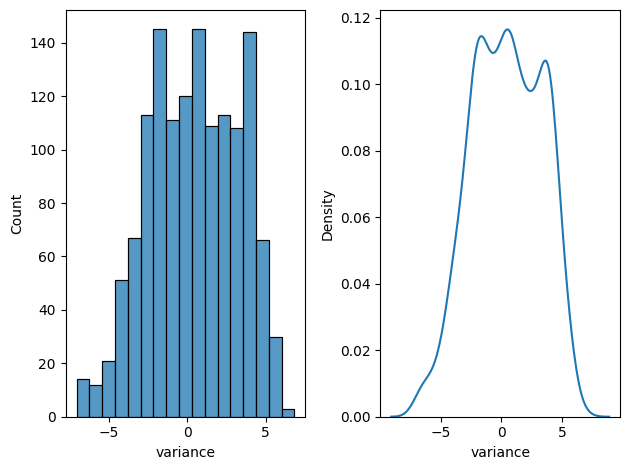

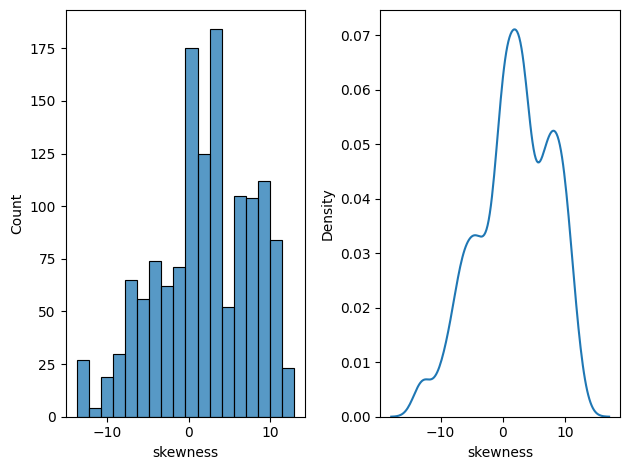

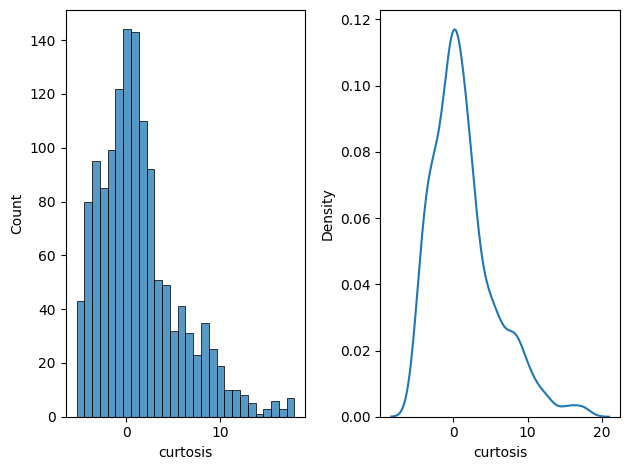

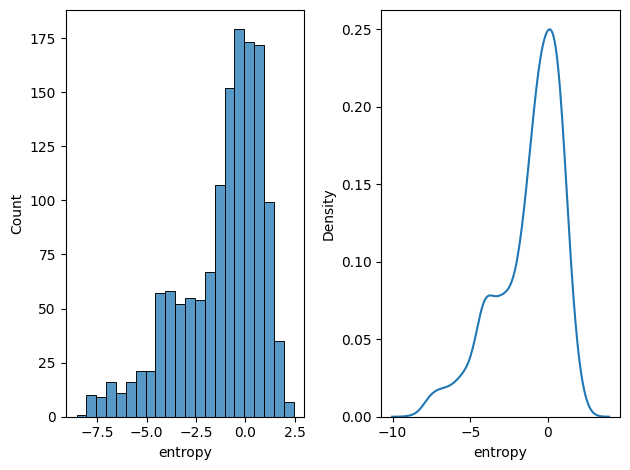

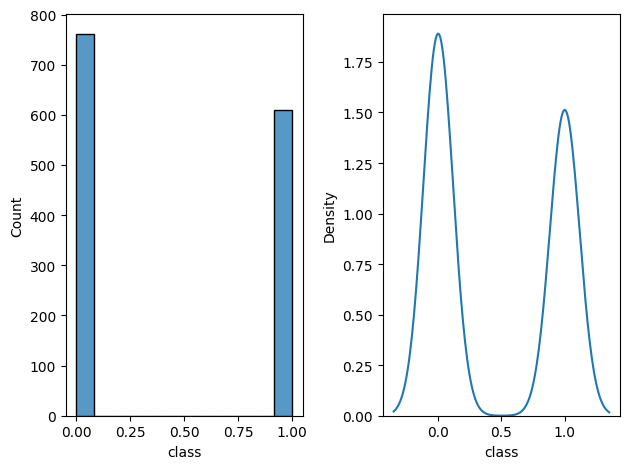

In [66]:
cols=df.columns

for col in cols:
  plt.subplot(1,2,1)
  sns.histplot(df[col])
  plt.subplot(1,2,2)
  sns.kdeplot(df[col])
  plt.tight_layout()
  plt.show()


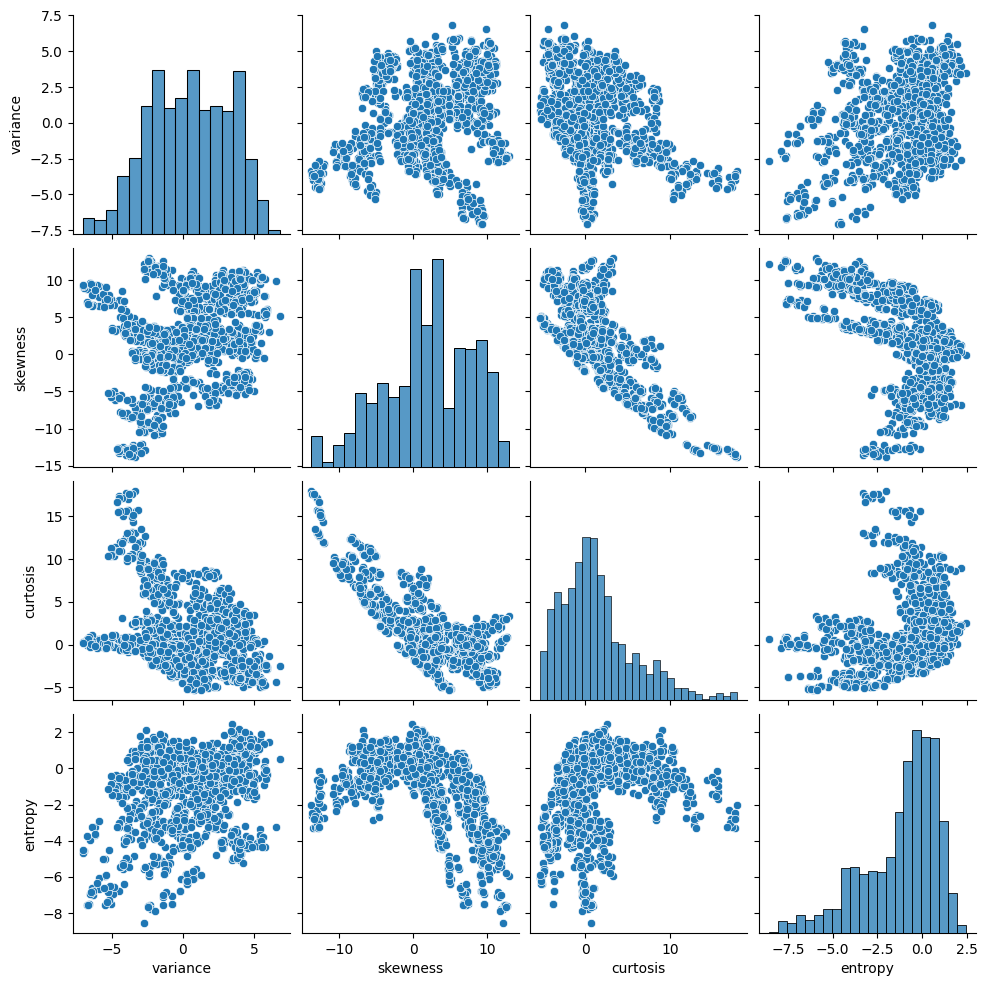

In [67]:
sns.pairplot(df.iloc[:,:-1])
plt.show()

In [68]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [69]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


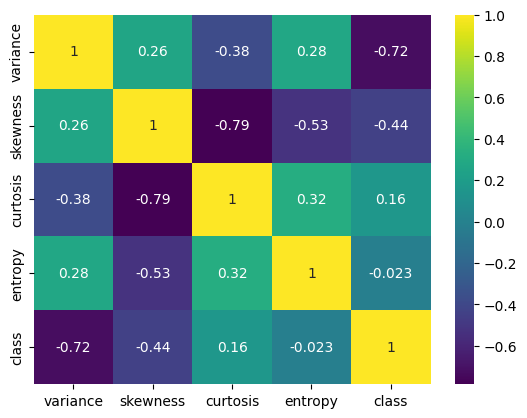

In [70]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

***data processing***

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [72]:
df['class']=df['class'].astype('category')

In [73]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [74]:
x=df.drop('class',axis=True)
y=df['class']

In [75]:
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [59]:
# from scipy.stats import zscore

# cols1=df.columns[:-1]
# for col in cols1:
#   df[col]=zscore(df[col])

In [60]:
# df.head()

,variance,skewness,curtosis,entropy,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


In [81]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [83]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.20,random_state=6)

In [84]:
x_train.shape

(877, 4)

***logistics regression***

In [85]:
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()

lr_model.fit(x_train,y_train)

LogisticRegression()

In [99]:
lr_pred=lr_model.predict(x_test)

In [101]:
from sklearn import metrics

lr_acc=metrics.accuracy_score(y_test,lr_pred)
print('accuracy: ',lr_acc)

accuracy:  0.9927272727272727


In [102]:
pd.DataFrame(metrics.confusion_matrix(y_test,lr_pred),index=['0','1'],columns=['pred-0','pred-1'])

,pred-0,pred-1
0,146,2
1,0,127


In [103]:
print(metrics.classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       148
           1       0.98      1.00      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



**Here 0-fakenote,1-notfake**

*Based on the above model recall of 1 is 100% ,but howevere we predicting 2fakenotes as not fake, but our model is better in able  to not predict the real note as fake.*

***KNN Classifier***

In [105]:
from sklearn.neighbors import KNeighborsClassifier

kn_model=KNeighborsClassifier(n_neighbors=5)

In [106]:
kn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [107]:
kn_pred=kn_model.predict(x_val)

In [109]:
print('accuracy: ',metrics.accuracy_score(y_val,kn_pred)*100)

accuracy:  100.0


we are getting 100% let us check now for xtest

In [110]:
resul_kn=kn_model.predict(x_test)

In [111]:
print('accuracy: ',metrics.accuracy_score(y_test,resul_kn)*100)

accuracy:  100.0


***model is perfectly fit***

In [112]:
pd.DataFrame(metrics.confusion_matrix(y_test,resul_kn),index=['0','1'],columns=['pred-0','pred-1'])

,pred-0,pred-1
0,148,0
1,0,127


In [113]:
print(metrics.classification_report(y_test,resul_kn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [114]:
from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=10, random_state=5, shuffle=True)
cross_val_score(kn_model,x_train,y_train,cv=kfold)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

we got knneighbors model is perfectly fit with our model, but let us also try other models below

***naive bayes***

In [115]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()

In [116]:
nb_model.fit(x_train,y_train)

GaussianNB()

In [117]:
nb_pred=nb_model.predict(x_val)

In [119]:
print('accuracy: ',metrics.accuracy_score(y_val,nb_pred)*100)

accuracy:  84.0909090909091


In [120]:
pd.DataFrame(metrics.confusion_matrix(y_val,nb_pred),index=['0','1'],columns=['pred-0','pred-1'])

,pred-0,pred-1
0,99,14
1,21,86


In [121]:
result_nb=nb_model.predict(x_test)

print('accuracy: ',metrics.accuracy_score(y_test,result_nb)*100)

accuracy:  79.27272727272727


In [122]:
pd.DataFrame(metrics.confusion_matrix(y_test,result_nb),index=['0','1'],columns=['pred-0','pred-1'])

,pred-0,pred-1
0,123,25
1,32,95


In [123]:
print(metrics.classification_report(y_test,result_nb))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       148
           1       0.79      0.75      0.77       127

    accuracy                           0.79       275
   macro avg       0.79      0.79      0.79       275
weighted avg       0.79      0.79      0.79       275



***SVM Classifier***

In [124]:
from sklearn.svm import SVC

sv_model=SVC(C=5)

In [125]:
sv_model.fit(x_train,y_train)

SVC(C=5)

In [126]:
sv_pred=sv_model.predict(x_val)

In [131]:
print('accuracy: ',metrics.accuracy_score(y_val,sv_pred)*100)

accuracy:  100.0


now try with x_test

In [130]:
reult_sv=sv_model.predict(x_test)

In [132]:
print('accuracy: ',metrics.accuracy_score(y_test,reult_sv)*100)

accuracy:  100.0


In [133]:
print(metrics.classification_report(y_test,reult_sv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [134]:
pd.DataFrame(metrics.confusion_matrix(y_test,reult_sv),index=['0','1'],columns=['pred-0','pred-1'])

,pred-0,pred-1
0,148,0
1,0,127


*SVC Model is also perfectly fit with our model*

**Decision Tree Classifier**

In [135]:
from sklearn.tree import DecisionTreeClassifier

dc_model=DecisionTreeClassifier(max_depth=3)

In [137]:
dc_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [138]:
dc_pred=dc_model.predict(x_val)

In [140]:
print('accuracy: ',metrics.accuracy_score(y_val,dc_pred)*100)

accuracy:  92.27272727272727


lets try tuning hyperparameter

In [151]:
from sklearn.model_selection import GridSearchCV

params={'criterion':['gini','entropy','log_loss'],
        'max_depth':[2,3,4,5,6,7],
        'max_features':['auto','sqrt','log2'],
        'min_samples_leaf':[1,2,3,4]}

grid=GridSearchCV(estimator=dc_model,param_grid=params,cv=5)
score=grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

In [152]:
score.best_score_

0.9817662337662337

In [153]:
score.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 3}

now create decision tree with these parameters

In [167]:
model_dt=DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features='auto',min_samples_leaf=3)

In [168]:
model_dt.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       min_samples_leaf=3)

In [169]:
dt_pred=model_dt.predict(x_val)

In [170]:
print('accuracy: ',metrics.accuracy_score(y_val,dt_pred)*100)

accuracy:  98.18181818181819


In [171]:
result_dt=model_dt.predict(x_test)

In [172]:
print('accuracy: ',metrics.accuracy_score(y_test,result_dt)*100)

accuracy:  96.0


In [173]:
pd.DataFrame(metrics.confusion_matrix(y_test,result_dt),index=['0','1'],columns=['pred-0','pred-1'])

,pred-0,pred-1
0,142,6
1,5,122


In [174]:
print(metrics.classification_report(y_test,result_dt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       148
           1       0.95      0.96      0.96       127

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



**Conclusion**

*Based on the models tested above, the best models were*
**KNN & SVC** 
*models are perfectly fitted*

*However logistic regression model is also giving around 99% accuracy*

*And Decision Tree classifier is giving about more than 95% accuracy*

**But Naive bayes model is giving low accuracy compare to other because the naive bayes algorithm runs with probability of the variable, which mainly prefered with discrete variables. but our dataset is mainly with continous variables**